In [2]:
import re
import pandas as pd
import numpy as np
import nltk
from nltk.parse import CoreNLPParser
from nltk.tree import Tree

In [3]:
parser = CoreNLPParser(url='http://localhost:9000')

# To run this parser is necessary to install it and start the service as decribed in 
# https://stanfordnlp.github.io/CoreNLP/corenlp-server.html

In [4]:
unneeded_nodes = [' $ ', '-$', '-NONE-', '#']

def get_rules(tree):
    # Get subtrees of the tree
    subtrees = tree.subtrees()
    rules = []

    # For each subtree get the rule that generates it's immediate child node
    for subtree in subtrees:
        children = [ch for ch in subtree]

        # Skip nodes that lead to leaves
        if len(children) > 0 and not type(children[0]) == str:
            # get labels of child nodes
            child_labels = [fix_label(ch.label()) for ch in children]

            # create rule string
            curr_rule = '  '.join([subtree.label()] + child_labels)

            # Exclude rules with unneeded nodes
            if not exclude_rule(curr_rule):
                rules.append(curr_rule)
    return rules

def fix_label(label):
    if not re.search(r'[a-zA-Z]', label):
        return 'Punc-' + label

    return label


def exclude_rule(rule):
    for n in unneeded_nodes:
        if n in rule:
            return True

    return False

## Parsing individual sentences

Vocab:
1 NNP Arthur
1 VBZ is
1 DT the
1 VBG King
1 . !

Grammar:
1 S2  S
1 S  NP  S|<VP-.>
1 NP  NNP
1 S|<VP-.>  VP  Punc-.
1 VP  VBZ  NP
1 NP  DT  NNP



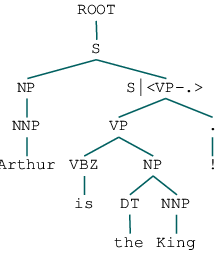

In [5]:
# Add the sentence you'd like to parse and extract vocab and grammar
sent = 'Arthur is the King !'

tokens = nltk.word_tokenize(sent)
pos_list = nltk.pos_tag(tokens)
print('Vocab:')
for i,j in pos_list:
    print(1,j,i)
print()

tree = next(parser.raw_parse(sent))
tree.chomsky_normal_form()
rules = get_rules(tree)
print('Grammar:')
for rule in rules:
    print(1, rule.replace('ROOT', 'S2'))
print()
tree